## Filter Design 

- A lowpass filter with the stopband frequency $f_{stop}$ (as defined in the next cell) as start of the stopband, with passband ripples of less than 1 dB and a stopband attenuation of at least 60 dB. The stop band starts at normalized frequency $f_{stop}$ (with $2 \cdot \pi$ being the sampling frequency). Have a transition band of width $0.1 \cdot \pi$. 
- Using the "remez" function.

In [ ]:
# Enter the f_stop frequency in Hz, round to 2 decimal points. E.g. f_stop_hz = 2000.27

def freqs_in_hz(f_stop, transition):

    fst= f_stop/(2*np.pi)
    fss = fst*48000
    f_stop_hz = round (fss,2)
    
    fst = transition/(2*np.pi)
    fss = fst*48000
    transition_hz=round (fss,2)

    return f_stop_hz, transition_hz

 - Run the cell below to validate your answer:

In [ ]:
f_stop_hz, transition_hz = freqs_in_hz(f_stop, 0.1*np.pi)

print("f_stop [Hz]:", f_stop_hz)
print("Transition [Hz]:", transition_hz)

# Tests for different f_stop and transition
new_f_stop = 0.4
new_transition = 0.6

new_f_stop_hz, new_transition_hz = freqs_in_hz(new_f_stop, new_transition)



f_stop [Hz]: 14739.17
Transition [Hz]: 2400.0


 - Calculate the filter coefficients by entering your code in the function below. 

In [ ]:
# Import necessary libraries here:
import numpy as np

# Complete the function with your code
def filter_coeffs(f_stop, transition):
    # YOUR CODE HERE
    h = sp.remez(64,[0,(f_stop - transition),f_stop,np.pi],[1,0],[1,100],fs=(2*np.pi))
    # YOUR CODE END HERE
    return h # h are the filter coefficiente


 - Validate your answer running the cell below:

Filter Coefficients: [ 7.20349882e-04  1.12625191e-03 -1.15869728e-03 -3.90778323e-03
 -1.73294736e-03  2.12589704e-03 -3.26938704e-04 -3.82373035e-03
  9.79556688e-04  4.41477607e-03 -2.97090550e-03 -5.03868064e-03
  5.50951290e-03  4.72588118e-03 -8.83371698e-03 -3.14257850e-03
  1.25444658e-02 -3.17361592e-04 -1.61356004e-02  6.14100247e-03
  1.87629410e-02 -1.48163847e-02 -1.92913801e-02  2.68779823e-02
  1.60590564e-02 -4.34138522e-02 -6.09307112e-03  6.79188184e-02
 -1.88352810e-02 -1.16962347e-01  1.08669410e-01  4.85173384e-01
  4.85173384e-01  1.08669410e-01 -1.16962347e-01 -1.88352810e-02
  6.79188184e-02 -6.09307112e-03 -4.34138522e-02  1.60590564e-02
  2.68779823e-02 -1.92913801e-02 -1.48163847e-02  1.87629410e-02
  6.14100247e-03 -1.61356004e-02 -3.17361592e-04  1.25444658e-02
 -3.14257850e-03 -8.83371698e-03  4.72588118e-03  5.50951290e-03
 -5.03868064e-03 -2.97090550e-03  4.41477607e-03  9.79556688e-04
 -3.82373035e-03 -3.26938704e-04  2.12589704e-03 -1.73294736e-03
 -3.

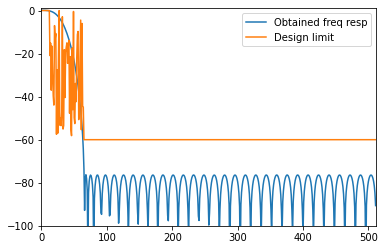

In [ ]:
import scipy.signal as sp
import numpy as np
import matplotlib.pyplot as plt
h = filter_coeffs(f_stop, 0.1*np.pi)
print("Filter Coefficients:", h)


# Test for different f_stop and transition band
new_f_stop = 0.4
new_transition = 0.3283185307179586

h_new=filter_coeffs(new_f_stop, new_transition)
w, H=sp.freqz(h_new)
#x=abs(H) #magnitude frequency response
x=20*np.log10(np.abs(H))

#Just for visual checking:
plt.plot(20*np.log10(np.abs(H))) #plot magnitude frequency response in dB
plt.axis([0,512,-100,1])
designlimit=-np.random.rand(512)*60
designlimit[0:int((0.027323954473516265)*512)]=0
designlimit[int((0.12732395447351627)*512) :]=-60
plt.plot(designlimit)
plt.legend(('Obtained freq resp','Design limit'))

